## Fashion Product Recommendation Based on Images

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [26]:
# Load Fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

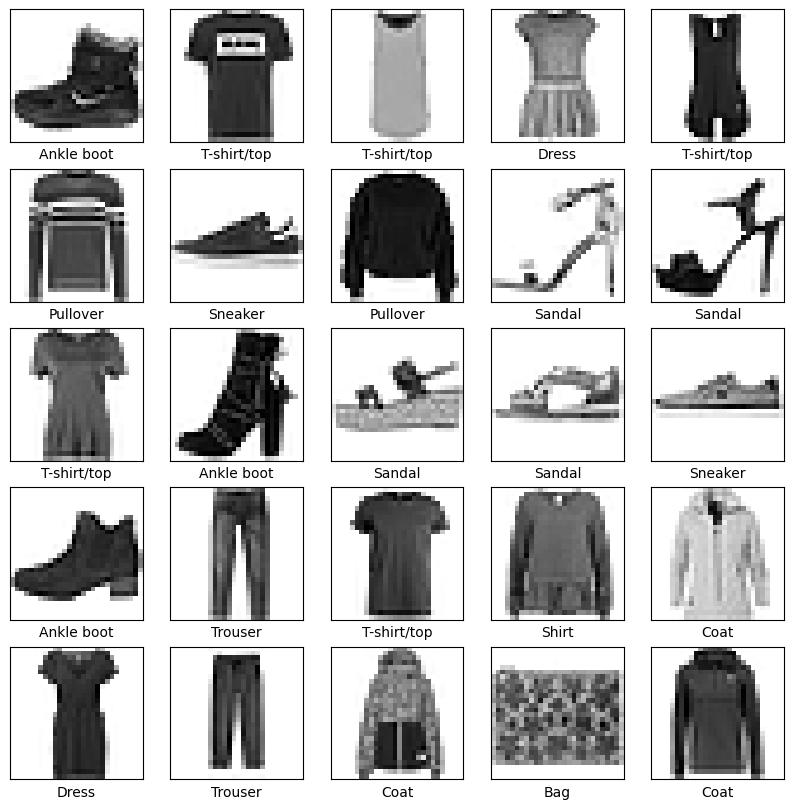

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [28]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7795 - loss: 0.6332
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8638 - loss: 0.3779
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8776 - loss: 0.3366
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8830 - loss: 0.3168
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8898 - loss: 0.2980
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8953 - loss: 0.2857
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9009 - loss: 0.2659
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9058 - loss: 0.2541
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9067 - loss: 0.2500
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9106 - loss: 0.2389


In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8863 - loss: 0.3351

Test accuracy: 0.8863000273704529


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


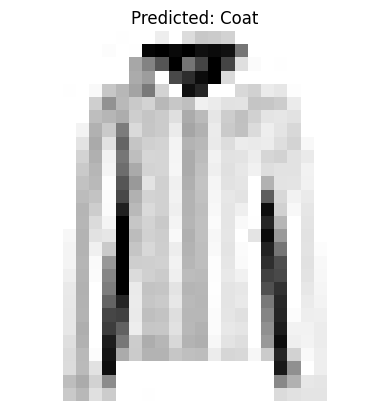

In [31]:
predictions = model.predict(test_images)

# Function to display predictions
def display_prediction(index):
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.title(f'Predicted: {class_names[np.argmax(predictions[index])]}')
    plt.axis('off')
    plt.show()

display_prediction(6)

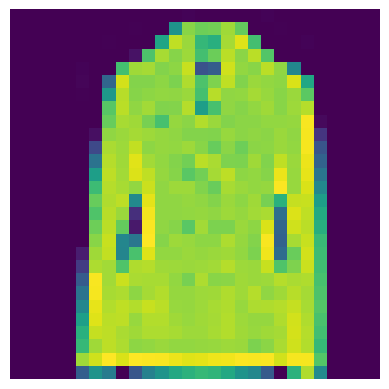

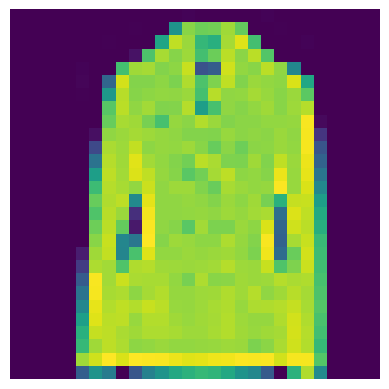

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your .csv dataset (replace 'your_dataset.csv' with your actual file path)
dataset_path = '/content/fashion-mnist_test.csv'
df = pd.read_csv(dataset_path)

# Assuming your dataset has pixel values in columns, you can extract them into a NumPy array
pixel_values = df.iloc[:, 1:].values  # Assuming pixel values start from the second column

# Reshape the pixel values into images (assuming each row represents an image)
num_images = pixel_values.shape[0]
image_height = 28  # Update with your image height
image_width = 28  # Update with your image width
images = pixel_values.reshape(num_images, image_height, image_width)

# Display the first image from the dataset
plt.imshow(images[12])
plt.axis('off')  # Hide axis
plt.show()

# Example operation: Normalize pixel values to the range [0, 1]
normalized_images = images / 255.0

# Display the normalized first image
plt.imshow(normalized_images[12])
plt.axis('off')  # Hide axis
plt.show()

# Save the processed dataset to a new .csv file (optional)
processed_df = pd.DataFrame(normalized_images.reshape(num_images, -1))  # Flatten images back to rows
processed_df.to_csv('processed_dataset.csv', index=False)

In [33]:
def recommend_similar_products(image):
    """
    Predicts and recommends similar products based on input image.
    """
    # Ensure the image has the shape (28, 28) before prediction
    if len(image.shape) == 4:  # If the image has batch and channel dimensions
        image = np.squeeze(image)  # Remove channel dimension, shape becomes (28, 28)

    image = np.expand_dims(image, axis=0)  # Add batch dimension, shape becomes (1, 28, 28)

    print(f"Input image shape: {image.shape}")  # Debugging output
    print(f"Model input shape: {model.input_shape}")  # Debugging output

    # Predict class using the model
    predictions = model.predict(image)

    # Get the index of the predicted class
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Map the index to the class label
    predicted_class_label = class_names[predicted_class_index]

    return predicted_class_label


Input image shape: (1, 28, 28)
Model input shape: (None, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class label: T-shirt/top



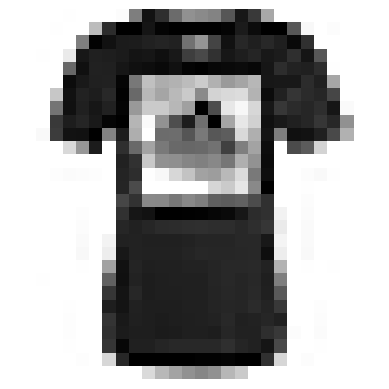

In [34]:
index_val=45

predicted_label = recommend_similar_products(normalized_images[index_val])
print(f"Predicted class label: {predicted_label}\n")

plt.imshow(normalized_images[index_val],cmap=plt.cm.binary)
plt.axis('off')
plt.show()


In [35]:
print(model.input_shape)

(None, 28, 28)


In [36]:
def recommend_similar_products_with_visuals(image_array, normalized_dataset, labels, num_recommendations=5):
    """
    Recommend similar products based on a given image array and display them.
    """
    # Ensure input image has the correct shape
    if len(image_array.shape) == 3:  # Remove channel if present
        image = image_array
    else:
        image = np.squeeze(image_array)

    # Add batch dimension to match the model's expected input
    image = np.expand_dims(image, axis=0)

    print(f"Input image shape: {image.shape}")
    print(f"Model input shape: {model.input_shape}")

    # Make a prediction
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)

    # Find indices of similar products in the dataset
    similar_indices = np.where(labels == predicted_class)[0][:num_recommendations]

    # Display the original image
    plt.figure(figsize=(15, 5))
    plt.subplot(1, num_recommendations + 1, 1)
    plt.imshow(image_array, cmap=plt.cm.binary)
    plt.title("Input Image")
    plt.axis('off')

    # Display the recommended images
    for i, idx in enumerate(similar_indices, start=2):
        plt.subplot(1, num_recommendations + 1, i)
        plt.imshow(normalized_dataset[idx], cmap=plt.cm.binary)
        plt.title(f"Recommendation {i-1}")
        plt.axis('off')

    plt.show()

    return similar_indices


Input image shape: (1, 28, 28)
Model input shape: (None, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


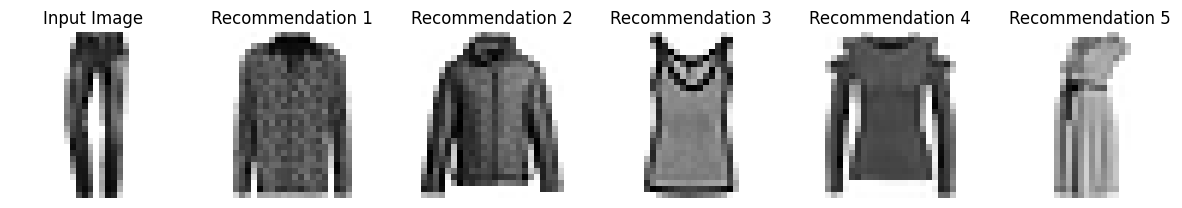

Recommended product indices: [16 21 38 69 71]


In [37]:
index_value = 1  # Index of the input image in normalized_images
recommended_indices = recommend_similar_products_with_visuals(
    normalized_images[index_value],  # Input image array
    normalized_images,               # Dataset
    train_labels,                    # Labels
    num_recommendations=5            # Number of recommendations
)
print(f"Recommended product indices: {recommended_indices}")
